# Black Friday Dataset

## Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

Columns:
- User_ID 
- Product_ID
- Gender
- Age
- OccupationId
- City_Category
- Stay_In_Current_City_Years
- Marital_Status
- Product_Category_1 (Clothes)
- Product_Category_2 (Electronics)
- Product_Category_3 (Home Goods)
- Purchase (Purchase amount in dollars)

## Questions to ask

1. Who is more likely to spend more in a Black Friday sale?
    - Men or Women?
    - Married or unmarried?
    - Old or new residents?
    - Which age range?
<br><br>

2. Which type of products are more likely to be sold in a sale like black Friday? <br><br>

3. Average spending based on each:
    - Age range
    - Gender
    - Marital status
 

4. Prediction/classification
   - Predict age of a customer based on the rest of available data.
   - Predict gender of a customer based on rest of data.
   - Predict amount of purchase based on rest of data.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style = 'whitegrid')
import matplotlib.pyplot as plt

In [9]:
bf = pd.read_csv('BlackFriday.csv')

bf.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [24]:
cols = list(bf.columns)

In [4]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [13]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [8]:
bf.shape

(537577, 12)

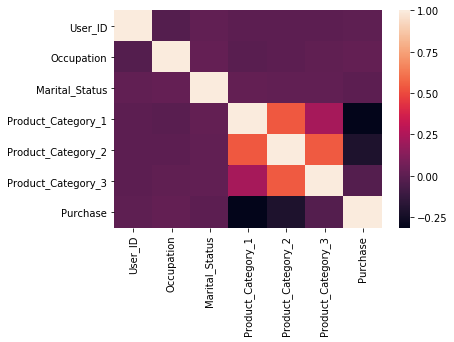

In [7]:
sns.heatmap(bf.corr())

In [12]:
len(np.unique(bf['Product_ID']))

3623

In [20]:
for col in bf.drop('Purchase', axis = 1).columns:
    print(col,':',np.unique(bf[col]))
    print()

User_ID : [1000001 1000002 1000003 ... 1006038 1006039 1006040]

Product_ID : ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']

Gender : ['F' 'M']

Age : ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']

Occupation : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

City_Category : ['A' 'B' 'C']

Stay_In_Current_City_Years : ['0' '1' '2' '3' '4+']

Marital_Status : [0 1]

Product_Category_1 : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]

Product_Category_2 : [ 2.  3.  4. ... nan nan nan]

Product_Category_3 : [ 3.  4.  5. ... nan nan nan]



In [27]:
bf.groupby('Product_Category_1').count()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase
Product_Category_1,,,,,,,,,,,
1,138353,138353,138353,138353,138353,138353,138353,138353,131855,89822,138353
2,23499,23499,23499,23499,23499,23499,23499,23499,22589,16045,23499
3,19849,19849,19849,19849,19849,19849,19849,19849,19616,12242,19849
4,11567,11567,11567,11567,11567,11567,11567,11567,11425,5257,11567
5,148592,148592,148592,148592,148592,148592,148592,148592,85804,18697,148592
6,20164,20164,20164,20164,20164,20164,20164,20164,19185,8280,20164
7,3668,3668,3668,3668,3668,3668,3668,3668,297,0,3668
8,112132,112132,112132,112132,112132,112132,112132,112132,52304,8937,112132
9,404,404,404,404,404,404,404,404,403,0,404


In [42]:
bf.fillna('NA', axis = 1, inplace = True) # Filling missing values with string 'NA'

In [46]:
bf['Product_Category_1'] = bf['Product_Category_1'].astype('object') # Changing data type to 'object'
bf['Occupation'] = bf['Occupation'].astype('object')
bf['Marital_Status'] = bf['Marital_Status'].astype('object')

In [47]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null object
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null object
Product_Category_1            537577 non-null object
Product_Category_2            537577 non-null object
Product_Category_3            537577 non-null object
Purchase                      537577 non-null int64
dtypes: int64(2), object(10)
memory usage: 49.2+ MB


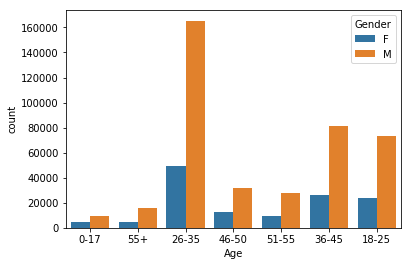

In [50]:
sns.countplot(bf['Age'], hue = bf['Gender'])

In [73]:
sorted(bf['Product_Category_1'], key = )

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
